<a href="https://colab.research.google.com/github/BaruchMM/Cosmologia/blob/main/Dinamica_de_sistema_cosmologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dinámica de sistema cosmológico

### Cuaderno interactivo con ejemplos de código
Este cuaderno provee al lector de teoría básica y el desarrollo de algunas ecuaciones de movimiento en la métrica de Friedmann-Lemaitre-Robertson-Walker (FLRW). Además, con la teoría se desarrollaron ejemplos.

### Material adicional:


*   [Unveiling the dynamics of the universe](https://arxiv.org/abs/physics/0609181)
*Capítulo 3 de "Relativity: Special, General, and Cosmological; Wolfgang Rindler"





In [475]:
import matplotlib.pyplot as plt 
import pylab as pl
import numpy as np 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as wd
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint
import sympy as sy
from scipy import integrate

# Teoría
### Definiciones previas
Para describir el tipo de materia que compone al universo, se elige utilizar fuidos perfectos homogéneo e isotrópico, que está definido por una densidad de energía $\rho_i(t)$ y su presión isotrópica $p_i(t)$ para cada i-ésimo fluido.

**Ecuación de estado**

La relación entre la densidad de energía y la presión isotrópica de cada fluído está definida en la ecuación de estado, en la cual asumirémos que es barotrópica:
$$p_i=(\gamma_i-1)\rho_i$$

En este cuaderno usarémos:


*   Radiación y partículas relativistas: $\gamma_r=4/3$
*   Materia sin presión: $\gamma_m=1$
*   Constante cosmológica: $\gamma_r=0$


Definimos valores de $\gamma_i$ en el código


***Para este cuaderno, es posible definir n fluidos perfectos con sus respectivas ecuaciones de estado $\gamma$ y su condición inicial.***

**Parámetros de densidad**

Definimos la densidad de energía crítica
$$\rho_c=\dfrac{3H^2}{8\pi G}$$
y finalmente el parámetro de densidad para cada fluido perfecto
$$\Omega_i=\dfrac{\rho_i}{\rho_c}=\dfrac{8\pi G\rho_i}{3H^2}$$
Para un universo plano, se tiene que la constricción de Friedmann es
$$1=\sum_{i=1}^n \Omega_i$$

**Parámetros de Hubble**

El parámetro de Hubble se define como **$H\equiv\dfrac{\dot{a}}{a}$**. Donde $a(t)$ se conoce como factor de escala que para el tiempo actual $a_0=1$. Por otra parte, es importante saber que para galaxias cercanas, la velocidad a la que se alejan es proporcional a la distancia física entre ellas.
$$v=H x$$
Con esto, podemos calcular la edad del universo, si $t=\dfrac{x}{v}$, entonces 
$$t=\dfrac{x}{Hx}=\dfrac{1}{H}$$
Sabemos que que a tiempo actual a=1, tal que $$t_{actual}=\dfrac{1}{\dfrac{\dot{a}}{a_0}}=\dfrac{1}{H_0}$$
El valor actual del parámetro de Hubble es $H_0=70$ $km$ $s^{−1} Mpc^{−1}$.
Si $1Mpc=3.08×10^{19}km$, tenemos toda la información para calcular la edad del universo **como una primera aproximación**.


In [476]:
H_0=70*(3.08567758128*10**19)**-1
Edad_del_universo=1/H_0 ### Está en segundos
##Lo convertimos a años
Edad_del_universo=Edad_del_universo/(3600*24*365.25)
print('La edad del universo es %1.2e '%Edad_del_universo+' de años.')

La edad del universo es 1.40e+10  de años.


## Ecuaciones dinámicas
Partiendo de las ecuaciones de movimiento
$$\dot{\rho}_i=-3H(\rho_i+p_i) \phantom{aaaaa} \dot{H}=-4\pi G\sum_i^n (\rho_i+p_i)+\dfrac{k}{a^2}$$
Tomamos un universo plano (k=0) y sustituimos la ecuación de estado en las ec de movimiento
$$\dot{\rho}_i=-3H\rho_i\gamma_i \phantom{aaaaa} \dot{H}=-4\pi G\sum_i^n \gamma_i\rho_i$$
Notemos que $\dot{\rho}=\frac{d\rho}{dt}$, utilizando el factor de escala $a_{(t)}$, definimos $N=\ln(a)$. Con esto, hacemos un cambio de variable de $t \rightarrow N$, entonces $\dfrac{d}{dt}=\dfrac{dN}{dt}\dfrac{d}{dN}=\dfrac{\dot{a}}{a}\dfrac{d}{dN}$. Recordemos que la definición del parámetro de Hubble es $H=\dfrac{\dot{a}}{a}$. Las ecuaciones de movimiento las reescribimos como
$$\rho'_i=-3\rho_i\gamma_i \phantom{aaaaa} H'=-\frac{4\pi G}{H}\sum_i^n \gamma_i\rho_i$$

Utilizando la definición del parámetro de densidad $\Omega_i=\dfrac{8\pi G\rho_i}{3H^2}$, encontramos su derivada con respecto a $N$.
$$\Omega_i'=\dfrac{8\pi G\rho_i}{3H^2}\left(\dfrac{\rho_i'}{\rho_i}-\dfrac{2H'}{H}\right)$$
Podemos sustituir $\rho'_i$ y $H'$ en la ecuación anterior, así obtenemos
$$\Omega_i'=3\Omega_i\left(\sum_j^n  \Omega_j\gamma_j -\gamma_i  \right)$$
Es importante denotar que la solución debe cumplir la constricción de Friedmann
$$\sum_{i=1}^n \Omega_i=1$$
Entonces podemos llevar a cabo dos métodos analíticos:


*   Resolver las 3 ecuaciones diferenciales y aplicar 3 condiciones iniciales para que se cumpla que 
$$\Omega_{m,0}+\Omega_{r,0}+\Omega_{\Lambda,0}=1$$
*   O aplicamos la constricción de Friedmann antes de resolver, tal que $\Omega'_{m,0}+\Omega'_{r,0}+\Omega'_{\Lambda,0}=0$ y podamos dejar la solucion de una de nuestras ecuaciones como una combinación de las soluciones de las otras dos. Entonces solo resolveríamos 2 ecuaciones diferenciales.



Definimos las condiciones iniciales, los $\Omega_0$ y sus respectivas ecuaciones de estado $\gamma$

In [477]:
omega0 = 0.0001,0.3,0.6999
gammas = 4/3,1,0
#definimos también el subíndice al que está asociado cada omega
syms = ["$\Omega_r$","$\Omega_m$","$\Omega_\lambda$"]
print(syms)

['$\\Omega_r$', '$\\Omega_m$', '$\\Omega_\\lambda$']


# Solución analítica


## Primer método
Se deben resolver las 3 ecuaciones diferenciales y después aplicar las condiciones iniciales. Debemos llegar a la solución 
$$\Omega_i=\Omega_{i,0}\dfrac{e^{-3\gamma_iN}}{\sum_{j=1}^{3}\Omega_{j,0}e^{-3\gamma_jN}}$$
y corroborar que se cumple la constricción de Friedmann para las condiciones iniciales.
$$\Omega_{0,m}+\Omega_{0,r}+\Omega_{0,\Lambda}=1$$


## Segundo método
Si aplicamos la constricción de Friedmann desde el inicio, tendremos que 
$$ \Omega_{m}+\Omega_{r}+\Omega_{\Lambda}=1 \phantom{aa}\Rightarrow \phantom{aa} \Omega_{\Lambda}=1-\Omega_{m}-\Omega_{r}$$
Si asignamos los sibíndices $m=1,r=2,\Lambda=3$.

Notemos que si recorremos índices para tener n+1 fluidos, obtenemos lo siguiente.
$$\Omega_i'=3\Omega_i\left(\sum_{j=1}^n  \Omega_j(\gamma_j-\gamma_{n-1}) -(\gamma_i-\gamma_{n-1})  \right)$$

Esto tiene como solución

$$\Omega_i=\Omega_{i,0}\dfrac{e^{-3\gamma_iN}}{\sum_{j=1}^{n+1}\Omega_{j,0}e^{-3\gamma_jN}}$$
Este método nos permite solo tener dos condiciones iniciales, ya que la tercera será la diferencia
$$ \Omega_{\Lambda,0}=1-\Omega_{m,0}-\Omega_{r,0}$$

In [478]:
inicio=-15
final=5
numero_de_puntos=1000
x=np.linspace(inicio,final,numero_de_puntos)

Definimos la suma $\sum_{j=1}^{3}\Omega_{j,0}e^{-3\gamma_jN}$

In [479]:
def Denominador_solucion(omega0, gammas,x):
  Den=0
  for i in range(len(omega0)):
    Den=omega0[i]*np.exp(-3*gammas[i]*x)+Den
  return Den

Escribimos la solución exacta de la ecuación diferencial utilizando las condiciones iniciales que cumplan la constricción de Friedmann

In [480]:
def soll(omega0,x):
  omega=[]
  i0= omega0
  for i in range(len(omega0)):
    omega.append(i0[i]*(np.exp(-3*gammas[i]*x))/Denominador_solucion(omega0,gammas,x))
  return omega

Notemos que estas condiciones iniciales respetan la constricción de Friedmann

In [481]:
sum=0
for i in range(len(omega0)):
  sum=omega0[i]+sum
print(sum) 

1.0


Encontramos nuestras soluciones analíticas con las condiciones iniciales y valores de gamma que definimos previamente

In [482]:
Sola=np.float64(soll(omega0,x))

Finalmete, graficamos las soluciones analíticas

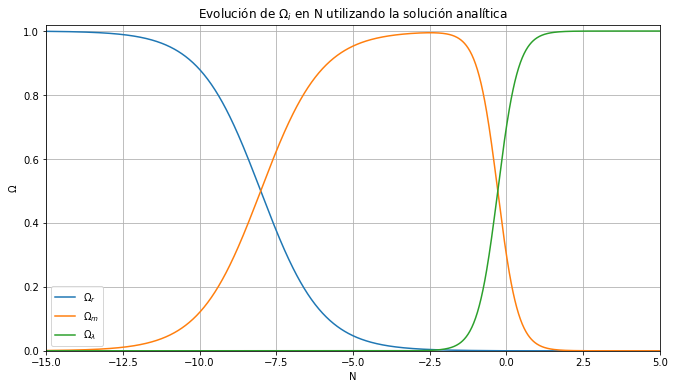

In [483]:
plt.figure(figsize=(11,6))
for i in range(len(omega0)):
  plt.plot(x, Sola[i], label=syms[i]) 
####
plt.xlabel('N')
plt.ylabel('$\Omega$')
plt.title('Evolución de $\Omega_i$ en N utilizando la solución analítica')
plt.legend()
plt.grid()
plt.xlim(inicio,final)
plt.ylim(0,1.02)
plt.show()

Usaremos la solución analítica para calcular la edad del universo.

In [501]:
i0=[]
for i in range(len(omega0)):
  i0.append(Sola[i][0])
print(i0)
N=np.linspace(inicio,0,1000)

[0.9990831344523903, 0.0009168655476096714, 6.123062705540685e-23]


 Sabemos que $H^2=\left ( \dfrac{\dot{a}}{a}\right)^2$ y que $\Omega_{i,0}=\dfrac{8\pi G\rho_i}{3H_0^2}$ es cada $\Omega_i$ al tiempo actual, desarrollamos $\dfrac{H^2}{H_0^2}$ y debemos obtener lo siguiente.
$$\dfrac{1}{H_0}\dfrac{da}{dt}\dfrac{1}{F(a)}=1 \phantom{aaaa}donde\phantom{aaaa}F(a)=\sqrt{\sum_i^n\Omega_{i,0} a^{2-3\gamma_i}}$$
Para el caso de 3 fluidos perfectos con parámetros de densidad $\Omega_{r},\Omega_{m},\Omega_{\lambda}$ y $\gamma_{r}=\dfrac{4}{3}, \gamma_m=1$ y $\gamma_{\lambda}=0$, tendremos que 
$$F(a)=\sqrt{\Omega_{r,0}a^{-2}+\Omega_{m,0}a^{-1}+\Omega_{\lambda,0}a^{2}}$$

Hcemos un cambio de variable $N=\ln(a)$
$$F(a)=\sqrt{\Omega_{r,0} e^{-2N}+\Omega_{m,0} e^{-N}+\Omega_{\lambda,0} e^{2N}}$$
Y además queda la ecuación diferencial siguiente: 
$$ \dfrac{dt}{dN}=\dfrac{1}{H_0}\dfrac{e^{N}}{F(N)} $$


In [502]:
def age(t0,N):
        F = np.sqrt(i0[0]*np.exp(-2*N)+i0[1]*np.exp(-N)+i0[2]*np.exp(2*N))
        dtdN = 1/H_0 * np.exp(N)/F
        return dtdN

Resolvemos la ecuación diferencial.

In [503]:
t0 = 0
Age = odeint(age, t0, N)/(3600*24*365.25) #convertimos de segundos a años
print('La edad del universo es %1.2e '%Age[-1]+' de años.')

[6.98529785e+09]
La edad del universo es 6.99e+09  de años.


Curiosamente, obtenemos la mitad del tiempo calculado a primera aproximación.

Para la solución numérica, definimos un sistema de ecuaciones diferenciales ordinarias que son
$$\Omega_i'=3\Omega_i\left(\sum_{j=1}^2  \Omega_j\gamma_j -\gamma_i  \right)$$

In [487]:
def eq(i0,x):
        y=[]
        for i in range(len(omega0)):
          y.append(i0[i])
        ysum=y[i]
        for i in range(len(omega0)-2):
          ysum=ysum+i0[i]
        y[i+1]=1-ysum #Constricción de Friedmann
        sumy=0
        dydt=[]
        for i in range(len(omega0)):
          sumy=sumy+y[i]*gammas[i]
        for i in range(len(omega0)):
          dydt.append(3*y[i]*(sumy-gammas[i]))
        return dydt

Este método numérico tomará como condiciones iniciales a la solución analítica para "N=inicio" (donde "inicio" es el valor definidio para el intervalo de N en la solución analítica).

In [488]:
i0=[]
for i in range(len(omega0)):
  i0.append(Sola[i][0])
print(i0)
x=np.linspace(inicio,final,1000)

[0.9990831344523903, 0.0009168655476096714, 6.123062705540685e-23]


In [489]:
print(eq(i0,x))

[-0.0009160249051773306, 0.0009160249051773304, 2.4486636796922177e-22]


Resolvemos el sistema de ecuaciones con la función odeint de la librería scipy.integrate

In [490]:
sol=odeint(eq, i0, x)

Finalmete graficamos las soluciones numéricas.

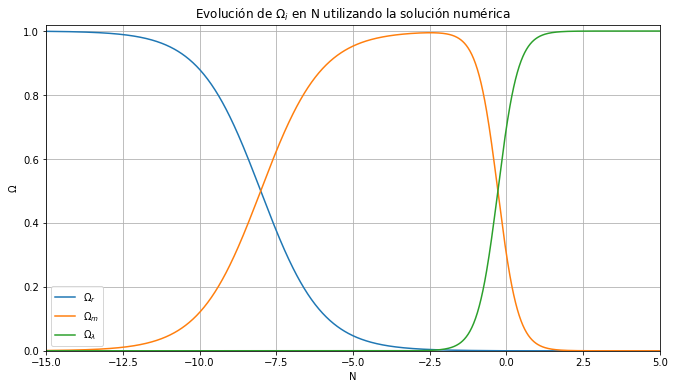

In [491]:
plt.figure(figsize=(11,6))
for i in range(len(omega0)):
  plt.plot(x, sol[:, i], label=syms[i]) 
plt.xlabel('N')
plt.ylabel('$\Omega$')
plt.title('Evolución de $\Omega_i$ en N utilizando la solución numérica')
plt.legend()
plt.grid()
plt.xlim(inicio,final)
plt.ylim(0,1.02)
plt.show()

Podemos hacer una comparación gráfica entre la solución numérica y la analítica, que graficamos a continuación. Las lineas continuas son la solución analítica, mientras que las discontinuas son las soluciones numéricas.

Para encontrar el error de nuestra solución numérica calculamos el error relativo
$$\dfrac{\tilde{\Omega}-\Omega}{\Omega}=\dfrac{\Delta\Omega}{\Omega}$$
donde $\Omega$ es la solución analítica y $\tilde{\Omega}$ es la solución numérica.

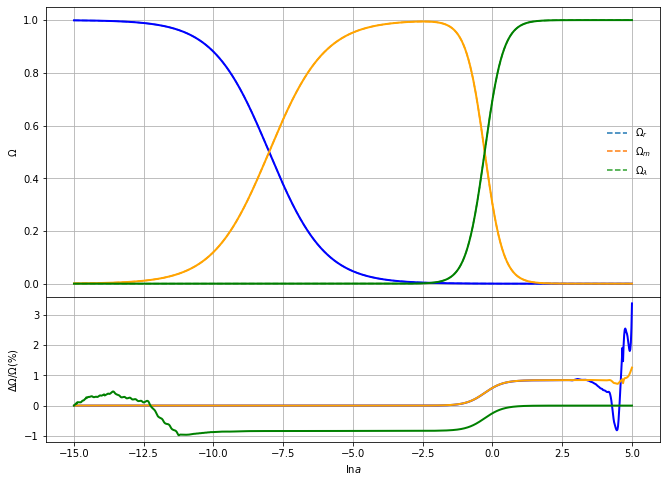

In [492]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(11,8))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
ax1=plt.subplot(gs[0])
###
colors=['b','orange','g']
for i in range(len(omega0)):
  ax1.plot(x, sol[:, i], '--') 
for i in range(len(omega0)):
  ax1.plot(x, sol[:, i],colors[i],lw=2) 
plt.grid()
ome=syms
###
ax2 = plt.subplot(gs[1], sharex = ax1)
for i in range(len(omega0)):
  ax2.plot(x,100*((-Sola[i]+sol[:, i])/Sola[i]),colors[i],lw=2)
plt.grid()
ax1.legend(ome,loc='best',frameon=False)
ax1.set_ylabel(r'$\Omega$')
ax2.set_xlabel(r'$\ln{a}$')
ax2.set_ylabel(r'$\Delta\Omega/\Omega (\%) $')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)

**Nota:** Entre más grande sea el dominio de $N=\ln(a)$, el error será mayor. Se puede cambiar el tamaño de N para comprobarlo, por ejemplo comparar $N=[-25,5]$ y $N=[-15,5]$.

Otra información de interés es conocer en qué puntos se tiene un tipo de materia dominante y cual es este tipo de materia. Para ello encontraremos el púnto en el que un n-ésimo fluido tenga $\Omega=0.5$. En ese valor tendremos que comienza a ser la materia dominante o deja de serlo.

Para ello, identificamos la materia dominante en las condiciones iniciales. Generamos una lista en la que el elemento dominante tiene asignado un 1.

In [493]:
k0=[]
o=0
for i in range(len(omega0)):
  o=o+1 #Determina el tamaño de Omega0
  k0.append(0)  #Crea un nuevo elemento dependiendo al tamaño de Omega0
  if Sola[i][0] > 0.5:
    k0[i]=1 #Asigna valor de 1 a la materia dominante en la condición inicial
  else:
    k0[i]=0
print(k0)

[1, 0, 0]


Ahora, determinamos los puntos en que cada solución se hace dominante, evitando repeticiones, ya que puede haber dos puntos en las que una solución $\Omega=0.5$, pero solo fue dominante una vez. La lista generada nos da n elementos asociados con cada n-ésima ecuación de estado y el valor de cada elemento nos dice el valor de $N=\ln(a)$ para el cual esta n-ésima materia se vuelve dominante. Y notemos el caso en el que un elemento de la lista es cero, esto se debe a que en las condiciones iniciales ya es dominante.

In [494]:
k=[]
for i in range(0,o):
  k.append(0)
  for j in range(len(Sola[0])):
    if Sola[i][j]<0.51 and Sola[i][j]>0.49:
      if k0[i]==0:
        N=inicio+j*(final-inicio)/numero_de_puntos
        k[i]=N
        break
k.pop(0) #eliminamos de la lista un elemento 0 sin información
print(k)

[-8.04, -0.3000000000000007]


Podemos observar esto gráficamente

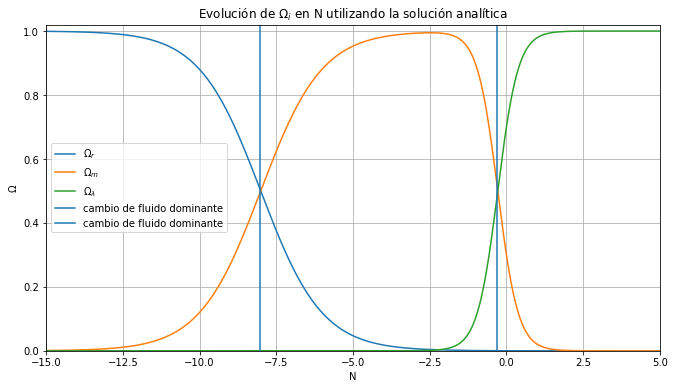

In [495]:
plt.figure(figsize=(11,6))
for i in range(len(omega0)):
  plt.plot(x, Sola[i], label=syms[i]) 
for i in range(len(k)):
  plt.axvline(k[i], 0, 1,label='cambio de fluido dominante')
####
plt.xlabel('N')
plt.ylabel('$\Omega$')
plt.title('Evolución de $\Omega_i$ en N utilizando la solución analítica')
plt.legend()
plt.grid()
plt.xlim(inicio,final)
plt.ylim(0,1.02)
plt.show()

También podemos obtener el espacio fase 

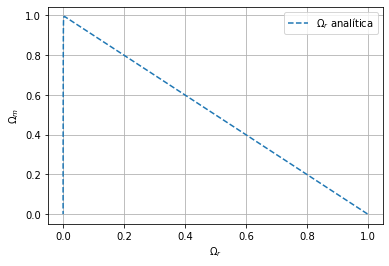

In [496]:
plt.plot(Sola[0], Sola[1],'--', label="$\Omega_r$ analítica")
####
plt.xlabel('$\Omega_r$')
plt.ylabel('$\Omega_m$')
plt.legend()
plt.grid()
plt.show()

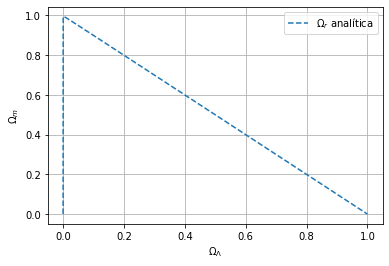

In [497]:
plt.plot(Sola[2], Sola[1],'--', label="$\Omega_r$ analítica")
####
plt.ylabel('$\Omega_m$')
plt.xlabel('$\Omega_{\Lambda}$')
plt.legend()
plt.grid()
plt.show()

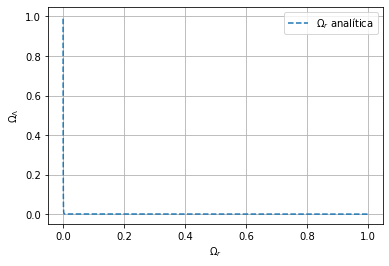

In [498]:
plt.plot(Sola[0], Sola[2],'--', label="$\Omega_r$ analítica")
####
plt.ylabel('$\Omega_{\Lambda}$')
plt.xlabel('$\Omega_r$')
plt.legend()
plt.grid()
plt.show()

In [499]:
def eqt(omega0,gammas,x):
        sum=0
        for i in range(len(omega0)):
          sum = sum +(omega0[i]*(np.exp(N))**(1-3*gammas[i]))

        dtdN = N/H0 * sum**(-1)
        return dydt
